Importujemy biblioteki wykorzystywane w tym notebook'u:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Odwracalność transformaty
Reprezentacja sygnałów w dziedzinie częstości jest dualna do reprezentacji  w dziedzinie czasu. To znaczy, że jedną reprezentację można przekształcić w drugą. Do przejścia z dziedziny czasu do częstości używaliśmy transformaty Fouriera (zaimplemantowanej w <tt>fft</tt>). Przejścia z dziedziny częstości do czasu dokonujemy przy pomocy odwrotnej transformaty Fouriera (zaimplementowanej jako <tt>ifft</tt>. Mając (zespolone) współczynniki w dziedzinie częstości dla pewnego sygnału, możemy odzyskać jego przebieg czasowy.
### Zadanie 
Proszę wygenerować sygnał:

<center>$s(t) = \sin(2\pi t \cdot 1)+\sin\left(2 \pi  t \cdot 3+\frac{\pi}{5}\right) $ </center>

o długości 2,5 s próbkowany 100 Hz

In [2]:
Fs = 100
dt = 1/Fs
T = 2.5
t = np.arange(0,T,dt)

s = np.sin(2*np.pi*1*t) + np.sin(2*np.pi*3*t + np.pi/5)

Proszę obliczyć jego transformatę Fouriera za pomocą <tt>fft</tt>, wykreślić widmo aplitudowe. 

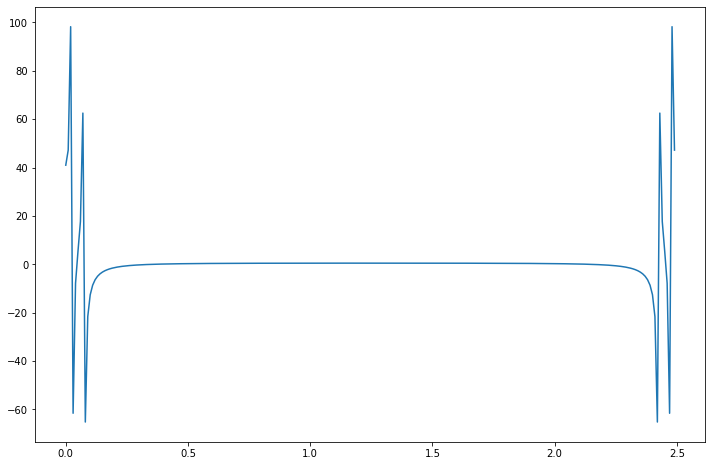

In [8]:
tf = np.real(np.fft.fft(s))

plt.figure(figsize=(12,8))
plt.plot(t, tf)
plt.show()

Następnie proszę zrekonstruować przebieg czasowy za pomocą <tt>ifft</tt>. Sygnał oryginalny i zrekonstruowany wykreślić na jednym rysunku. 

Uwaga: funkcja ifft zwraca wektor liczb zespolonych. Sprawdź jaka jest jegeo część urojona. Na wykresie rekonstrukcji przedstaw jego część rzeczywistą.

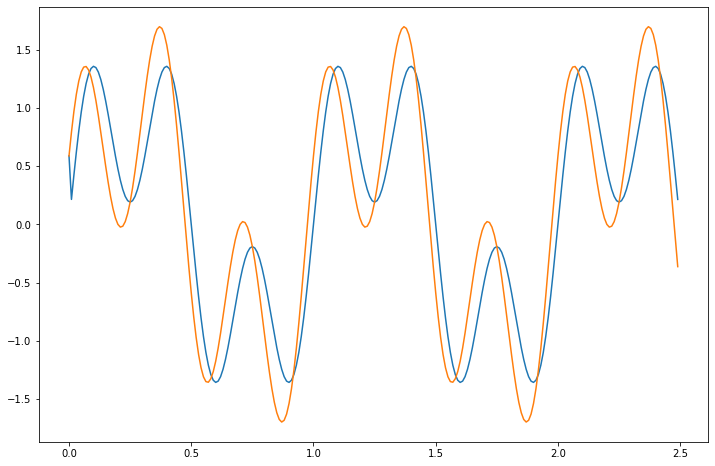

In [11]:
tfi = np.real(np.fft.ifft(tf))

plt.figure(figsize=(12,8))
plt.plot(t, tfi)
plt.plot(t, s)
plt.show()

Dla porównania proszę zrekonstruować sygnał korzystając jawnie z postaci odwrotnej transformaty Fouriera danej wzorem:

<center> $x(n)=\frac{1}{N} \sum_{k=0}^{N-1} S[k] \cdot \exp\left(2j \pi n\frac{ k}{N}\right)$ </center>

Zwróćmy uwagę, że ''n'' w powyższym wzorze to indeksy punktów czasu, zatem wiążą się one z czasem zwracanym przez nasze funkcje następująco:

In [12]:
n = np.arange(0,len(t),1)

zatem kod rekonstruujący może być na przykład taki (proszę uzupelnić brakujące elementy):

In [ ]:
N = ...
s_rekonstrukcja = np.zeros(..., dtype='complex128')
for k in range(0,N):
    s_rekonstrukcja += 1.0/... * S[k]*np.exp((2j*np.pi*n*k)/N)
plt.subplot(2,1,1)
plt.plot(t,s)
plt.subplot(2,1,2)
plt.plot(t,np.real(s_rekonstrukcja))
plt.show()

<!--
<source lang = python>
# -*- coding: utf-8 -*-

import pylab as py
import numpy as np
import numpy.fft as FFT

def sin(f = 1, T = 1, Fs = 128, phi =0 ):
	'''sin o zadanej częstości (w Hz), długości, fazie i częstości próbkowania
	Domyślnie wytwarzany jest sygnał reprezentujący 
	1 sekundę sinusa o częstości 1Hz i zerowej fazie próbkowanego 128 Hz
	'''
 
	dt = 1.0/Fs
	t = np.arange(0,T,dt)
	s = np.sin(2*np.pi*f*t + phi)
	return (s,t)	

def f1(dt):
	'''funkcja zwracająca sygnał moduł t na odcinku -1 1 próbkowanym co dt	'''
	t = np.arange(0,2,dt)
	s = np.sin(2*np.pi*t)+np.sin(2*np.pi*3*t+np.pi/5)#np.abs(t)#
	return (s,t)
	
# część testująca
dt = 0.1	
Fs = 1.0/dt

(s1,t) = sin(f=1,T=2.5, Fs= 10, phi =0) #generuję sygnał
(s2,t) = sin(f=3,T=2.5, Fs= 10, phi =np.pi/5)
s = s1 + s2
S = FFT.fft(s) # obliczam transformatę sygnału s
N = len(t)

s_ifft = FFT.ifft(S)

n = np.arange(0,len(t),1)
s_rekonstrukcja = np.zeros(len(t))
for k in range(0,N):
	s_rekonstrukcja += 1.0/N * S[k]*np.exp((2j*np.pi*n*k)/N)

py.figure(1)
py.plot(t,s_ifft,'bo',markersize = 3 )
py.plot(t,(s_rekonstrukcja),'gx',markersize = 8)
py.plot(t,s,'r+-',markersize = 8)
</source>
-->
<!--
=====Rekonstrukcja na dłuższym odcinku czasu:=====
Korzystając z wyników poprzedniego polecenia proszę porównać wykres funkcji zadanych wzorami dla odcinak czasu o długości 5s i rekonstrukcję sygnału o długości 5s otrzymanego ze współczynników Fouriera obliczonych dla 2,5s  odcinak czasu.
* Na jakim odcinku czasu sygnały są zgodne?
* Co dzieje się na dalszym odcinku czasu?
 *
-->
<!--
dalszy ciąg poprzedniego kodu:
<source lang = python>
py.figure(2)
(s1_d,t_d) = sin(f=1,T=5, Fs= 10, phi =0) #generuję sygnał
(s2_d,t_d) = sin(f=3,T=5, Fs= 10, phi =np.pi/5)
s_d = s1_d + s2_d

# rekonstrukcja bazująca na współczynnikach otzrzynmanych dla 2sek fragmentu sygnału
n=np.arange(0,len(t_d),1)
s_rekonstrukcja_dluga = np.zeros(len(t_d)) 
for k in range(0,N):
	s_rekonstrukcja_dluga += 1.0/N * S[k]*np.exp((2j*np.pi*n*k)/N)
py.plot(t_d,(s_rekonstrukcja_dluga),'gx-',markersize = 8)
py.plot(t_d,s_d,'r+-',markersize = 8)
</source>
-->

<!--
=====Przykład:=====
Oblicz współczynniki numerycznie korzystając z <tt>numpy.fft.fft</tt>, porównaj z otrzymanymi analitycznie. Zrób wykresy funkcji i wartości bezwzględnej transformaty. Dla funkcji ''f'' z poprzedniego przykładu danej wzorem:
:<math> f(t)=|t| </math> określonej na odcinku <math>t \in [-1, 1]</math> próbkowanej z interwałem 0.1,

Obliczamy współczynniki i robimy wykres:
<source lang = python>
# -*- coding: utf-8 -*-

import pylab as py
import numpy as np
import numpy.fft as FFT

def f1():
	'''funkcja zwracająca sygnał moduł t na odcinku -1 1 próbkowanym co 0.1	'''
	dt = 0.1	
	t = np.arange(-1,1,dt)
	s = np.abs(t)
	return (s,t)
	
# część testująca
Fs = 10.0
(s,t) = f1() #generuję sygnał
py.subplot(2,1,1)
py.stem(t,s)

S=FFT.fft(s) # obliczam transformatę sygnału s
F = FFT.fftfreq(len(S),Fs) # obliczam skalę częstości 
py.subplot(2,1,2)
py.stem(F,np.abs(S)/len(s)) # wykreślam widmo amplitudowe
py.show()
</source>

Porównujemy wyniki z wynikami analitycznymi:
* <math> f(t) = |cos(t)|</math> określonej na odcinku <math>t \in [-\pi, \pi]</math> próbkowanej z interwałem 0.1

-->

# Badanie rozdzielczości sygnałami testowymi
* Poniżej będziemy zajmować się sygnałami rzeczywistymi, więc stosujemy funkcje z rodziny Real FFT:
https://docs.scipy.org/doc/numpy/reference/routines.fft.html

* W poniższych przykładach jako widmo będziemy rozumieli widmo amplitudowe, tzn wartość bezwzględną ze współczynników szeregu Fouriera.

# Widmo sinusoidy i delty
Najprostsza sytuacja: Badamy współczynniki zwracane przez <tt>fft</tt> dla sinusoid o różnych częstościach. 

## Zadanie


Proszę kolejno wygenerować sinusoidy o długości 1s próbkowaną 32Hz i częstościach 1,10, 16 i 0 Hz.
Dla tych sinusoid proszę policzyć transformaty Fouriera i wykreślić zarówno sygnały jak i wartość bezwzględne otrzymanych współczynników.

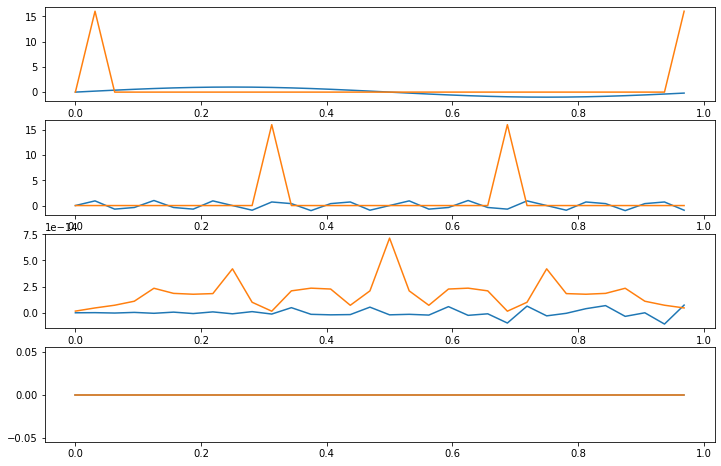

In [17]:
Fs = 32
dt = 1/Fs
T = 1
t = np.arange(0,T,dt)

s1 = np.sin(2*np.pi*1*t)
s2 = np.sin(2*np.pi*10*t)
s3 = np.sin(2*np.pi*16*t)
s4 = np.sin(2*np.pi*0*t)

tf1 = np.fft.fft(s1)
tf2 = np.fft.fft(s2)
tf3 = np.fft.fft(s3)
tf4 = np.fft.fft(s4)

plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(t, s1)
plt.plot(t, np.abs(tf1))

plt.subplot(4,1,2)
plt.plot(t, s2)
plt.plot(t, np.abs(tf2))

plt.subplot(4,1,3)
plt.plot(t, s3)
plt.plot(t, np.abs(tf3))

plt.subplot(4,1,4)
plt.plot(t, s4)
plt.plot(t, np.abs(tf4))

plt.show()

#### Proszę odpowiedzieć na pytania:
Jak wyglądają otrzymane wykresy?

Czy coś szczególnego dzieje się dla częstości 0 i 16Hz? Czy w tych skrajnych przypadkach faza sygnału ma wpływ na wynik transformaty?

### Zadanie
Proszę zaimplementować funkcje delta:

In [19]:
def delta(t0=0.5, T=1,Fs = 128):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    d = np.zeros(len(t))
    idx = int(np.ceil(t0*Fs)) # indekx próbki gdzie chcemy mieć wstawioną deltę
    d[idx]=1
    return (t,d)

Proszę wygenerować sygnał delta położony w sekundzie 0,5 na odcinku czasu o długości 1s próbkowany 128Hz. 

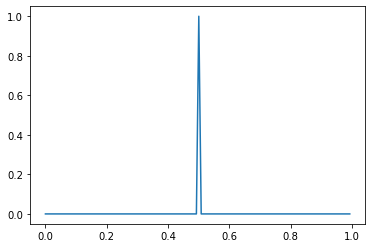

In [20]:
Fs = 128
idx = 0.5
T = 1

t,d = delta()
plt.plot(t,d)
plt.show()

Dla takiego sygnału proszę policzyć transformatę Fouriera i wykreślić zarówno sygnały jak i wartości bezwzględne otrzymanych współczynników.

C:\Users\maloszukm\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


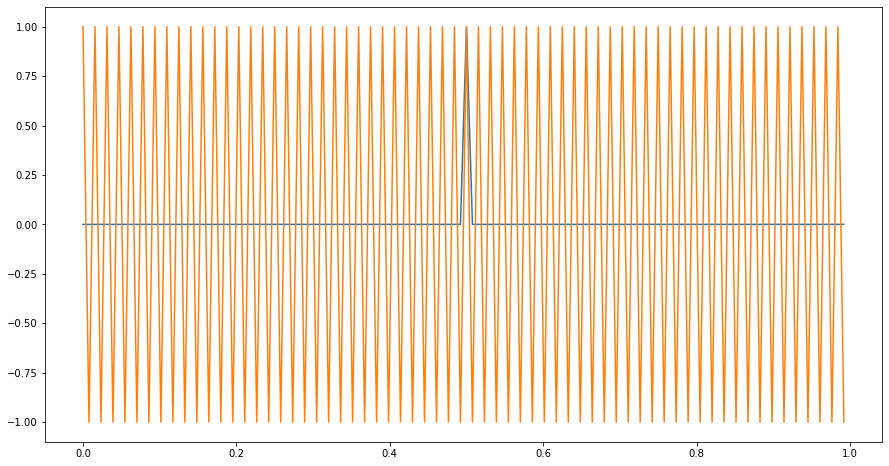

In [39]:
ft = np.fft.fft(d)

plt.figure(figsize=(15,8))

plt.plot(t,d)
plt.plot(t,ft)

plt.show()

#### Proszę odpowiedzieć na pytania:

Jak wygląda transformata funkcji delta?

Jakie częstości w sobie zawiera?

## Efekt nieciągłości funkcji
### Zadanie
* Wygenerować sinusoidę o następujących własnościach: f=10 Hz, T=1, Fs=100 Hz, i fazie = 1;

In [40]:
Fs = 100
dt = 1/Fs
T = 1
f = 10
t = np.arange(0,T,dt)
phi = 1

s = np.sin(2*np.pi*f*t + phi)

* Przy pomocy subplotów proszę sporządzić rysunek zgodnie z ponższym opisem:
 * subplot(2,2,1): przebieg sygnału w czasie 
 * subplot(2,2,2): moduł jego transformaty Fouriera (narysować za pomocą funkcji <tt>py.stem</tt> wraz zprawidłową osią częstości,
 * subplot(2,2,3): Proszę wykreślić trzykrotnie periodycznie powielony oryginalny sygnał. Można go skonstruować wywołując funkcję: <tt>s_period = np.concatenate((s,s,s))</tt>.
 * subplot(2,2,4): moduł transformaty Fouriera <tt>s_period</tt> (narysować za pomocą funkcji <tt>py.stem</tt> wraz zprawidłową osią częstości

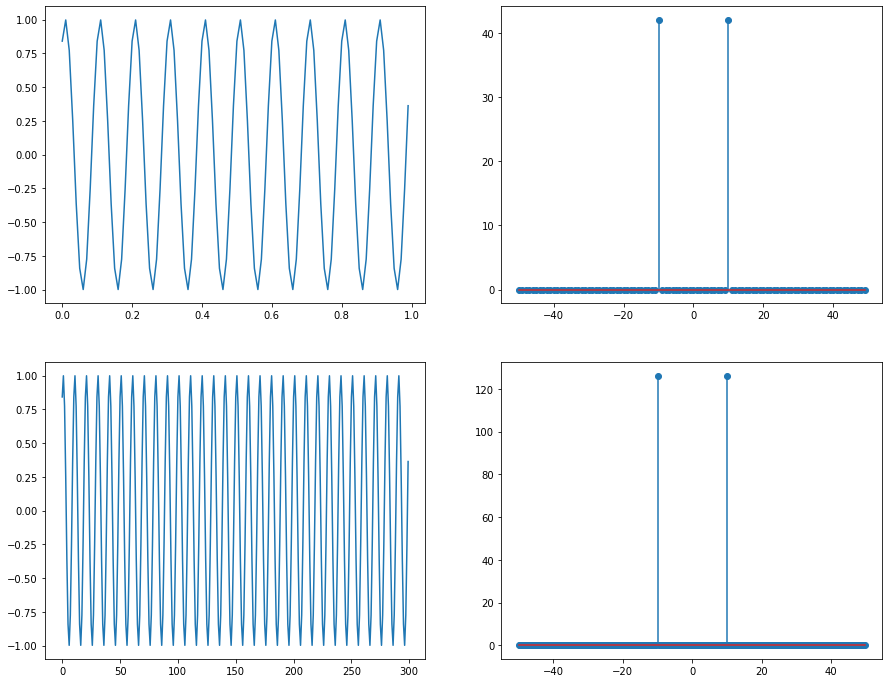

In [54]:
F = np.fft.fftfreq(len(s), 1/Fs) 
Fp = np.fft.fftfreq(3*len(s), 1/Fs)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(t,s)

ft = np.fft.fft(s)
plt.subplot(2,2,2)
plt.stem(F,np.real(ft))

s_period = np.concatenate((s,s,s))
plt.subplot(2,2,3)
plt.plot(s_period)

ft_period = np.fft.fft(s_period)
plt.subplot(2,2,4)
plt.stem(Fp,np.real(ft_period))

plt.show()

Powtórz te same kroki dla sinusa o częstości 10.3 Hz.

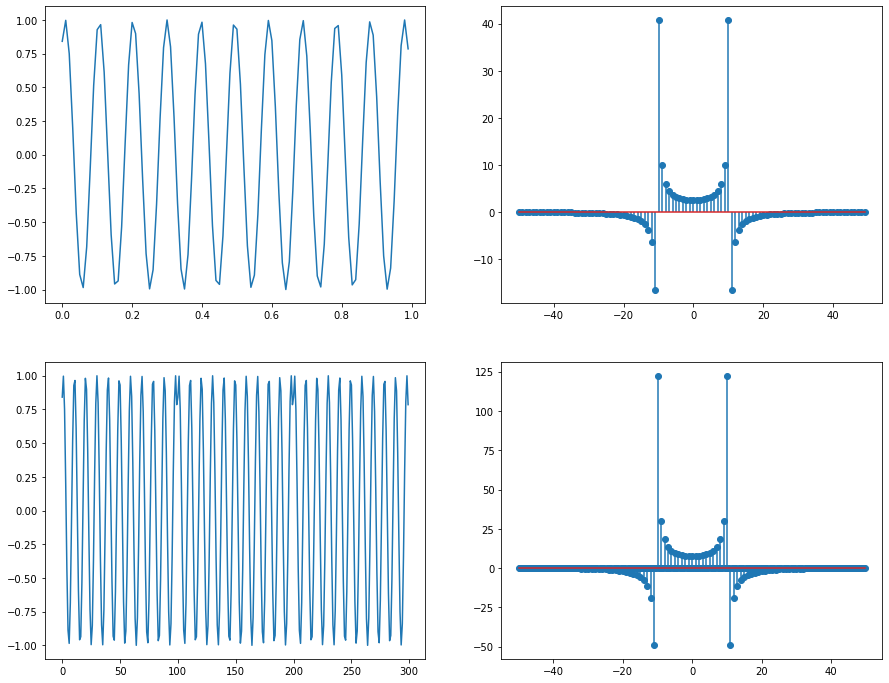

In [56]:
Fs = 100
dt = 1/Fs
T = 1
f = 10.3
t = np.arange(0,T,dt)
phi = 1

s = np.sin(2*np.pi*f*t + phi)

F = np.fft.fftfreq(len(s), 1/Fs) 
Fp = np.fft.fftfreq(3*len(s), 1/Fs)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(t,s)

ft = np.fft.fft(s)
plt.subplot(2,2,2)
plt.stem(F,np.real(ft))

s_period = np.concatenate((s,s,s))
plt.subplot(2,2,3)
plt.plot(s_period)

ft_period = np.fft.fft(s_period)
plt.subplot(2,2,4)
plt.stem(Fp,np.real(ft_period))

plt.show()

#### Odpowiedz na pytania:

Czym różnią się przedłużenia sinusoidy 10 Hz od sinusoidy 10.3 Hz? Proszę zwrócić uwagę na miejsca sklejania sygnałów.

Skąd bierze się widoczna różnica w widmie sinusoidy 10 Hz i 10.3 Hz?

### Długość sygnału a rozdzielczość widma FFT
Z dotychczasowych rozważań o transformacie Fouriera ograniczonych w czasie sygnałów dyskretnych wynika, że w widmie reprezentowane są częstości od $-F_N$ do $F_N$ gdzie $F_N$ to częstości Nyquista. Dostępnych binów częstości jest ''N'' - tyle samo ile obserwowanych punktów sygnału.

* jaki dostęp między binami częstotliwości mamy dla 1 s sygnału próbkowanego 10Hz?

* jaki dostęp między binami częstotliwości mamy dla 1 s sygnału próbkowanego 100Hz?

* jaki dostęp między binami częstotliwości mamy dla 1 s sygnału próbkowanego 1000Hz?

* jaki dostęp między binami częstotliwości mamy dla 10 s sygnału próbkowanego 10Hz?

* jaki dostęp między binami częstotliwości mamy dla 100 s sygnału próbkowanego 10Hz?

Zatem zwiększenie długości sygnału w czasie poprawia "rozdzielczość"  reprezentacji częstotliwościowej sygnału. 

Załóżmy, że dysponujemy jedynie sekwencją ''N'' próbek pewnego sygnału. 

Rozważymy teraz jakie można przyjąć strategie przedłużania tego sygnału w celu zwiększenia gęstości binów częstotliwościowych i jakie te strategie mają konsekwencje.

<!--
=====Przedłużenie przez periodyczną replikację =====
Rozważając poprzednie przykłady zauważyliśmy, że FFT "widzi" sygnał tak jakby to była nieskończona periodyczna replikacja fragmentu sygnału podanego na wejście. Zatem najbardziej naturalną formą przedłużenia sygnału może wydawać się postępowanie zgodnie z tym sposobem widzenia i dołożenie do sygnału kolejnych segmentów zawierających kopie analizowanego fragmentu sygnału. Zbadajmy empirycznie efekty takiego podejścia. 

* Proszę wytworzyć i wykreślić sinusoidy o częstościach 15 i 20 Hz, trwające 0.1s i próbkowane 100Hz. 
 * Ile próbek sygnału dostajemy?
 * Proszę obliczyć transformatę Fouriera. Ile punktów w widmie amplitudowym otrzymujemy? Dla jakich cżęstości mamy biny?
 * Proszę skonstruować sygnał będący złożeniem 10 kopii oryginalnego sygnału. 
Jest to 10-krotnie dłuższy fragment sygnału, którego wersję nieskończoną opisują współczynniki obliczone przez transformatę Fouriera. Transformata policzona z takiego wydłużonego odcinak ma 10-krotnie więcej binów. W szczególności zawiera on bin 15Hz. Proszę porównać wykresy widma amplitudowego otrzymanego dla wersji krótkiej i przedłużonej sygnału. Czy wynik jest zaskakujący? Jak go można zrozumieć?
 * Sygnał przedłużony periodycznie nie zawiera żadnej dodatkowej informacji względem pojedynczego okresu!
-->

## Przedłużanie sygnału
### Przedłużanie przez cykliczne powielenie
Zobaczmy co się stanie jesli przedłużymy sygnał przez jego periodyczne przedłużenie. 

Prosze uzupełnić poniższą funkcje:

In [72]:
def powiel_sygnal(t,s, n=10):  
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(t,s)
    plt.subplot(2,2,2)
    S = fft.rfft(s)/len(s)
    F = fft.rfftfreq(len(s),1/Fs)
    plt.stem(F,np.abs(S))

    z= np.zeros(len(s))
    plt.subplot(2,2,3)
    s_period = np.hstack([s]*n)# n razy powtarzamy s
    t_period = np.arange(0,T*n,1/Fs)
    plt.plot(t_period,s_period)

    plt.subplot(2,2,4)
    S_period = fft.rfft(s_period)/len(s)
    F_period = fft.rfftfreq(len(s_period),1/Fs)
    plt.stem(F_period,np.abs(S_period)/(len(s_period)))
    plt.stem(F,np.abs(S),linefmt='r-', markerfmt='ro')

    plt.show()

Proszę zbadać efekty takiego przedłużania stosując uzupełnioną funkcje do sinusa o częstości 10Hz, okresie 0.1 s oraz częstości próbkowania 100Hz

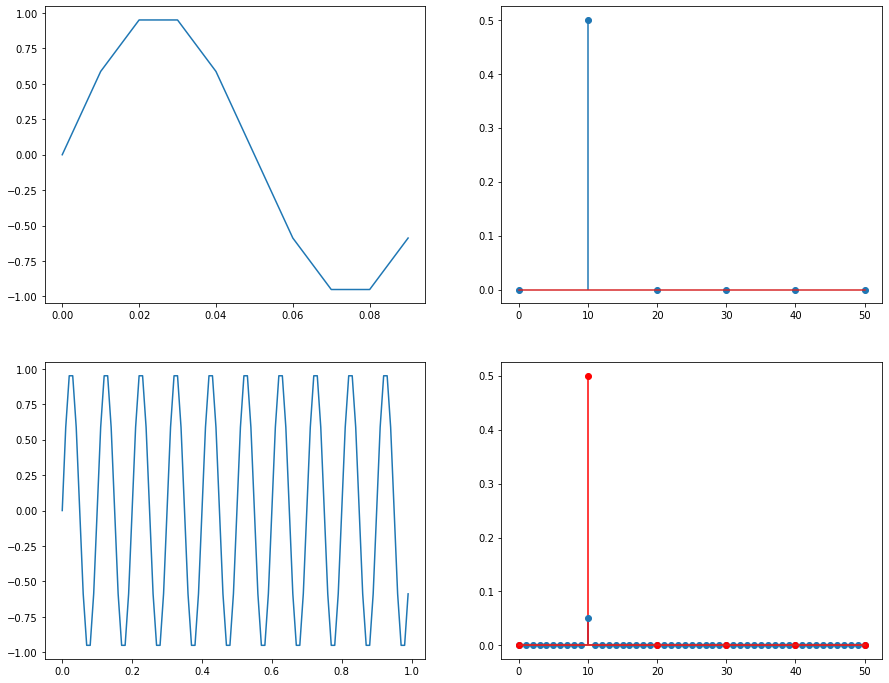

In [73]:
Fs = 100
dt = 1/Fs
T = 0.1
f = 10
t = np.arange(0,T,dt)

s = np.sin(2*np.pi*f*t)
powiel_sygnal(t,s)

Proszę wywołać funkcje dla sygnału będuącego sumą sinusów o częstości 15 i 20 Hz, dla częstości próbkowania 100Hz i czasu trwania sygnału 0.1s

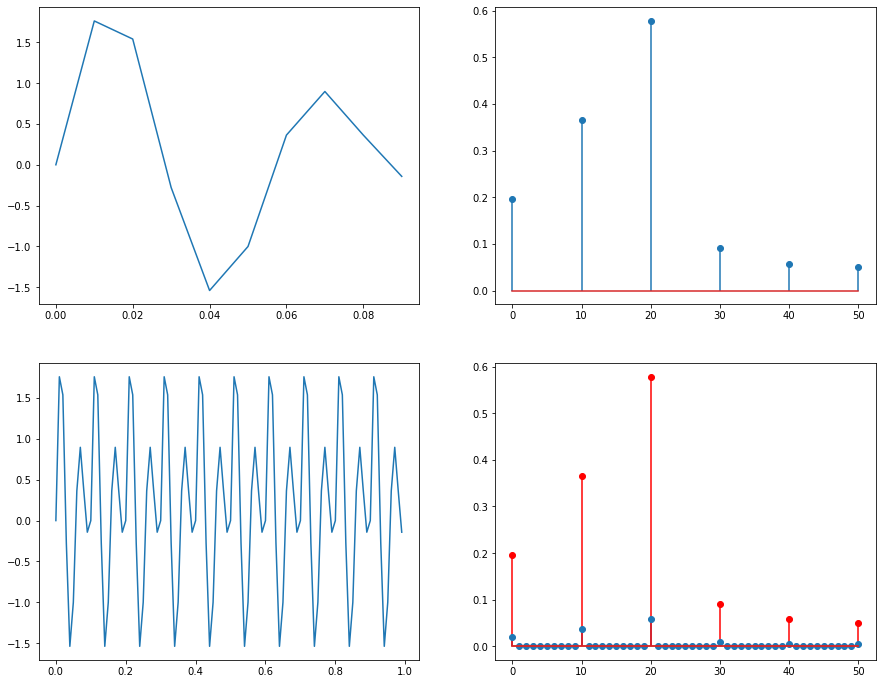

In [74]:
Fs = 100
dt = 1/Fs
T = 0.1
f1 = 15
f2 = 20
t = np.arange(0,T,dt)

s = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
powiel_sygnal(t,s)

#### Przedłużanie zerami
Metodą na zwiększanie ilości binów w transformacie Fouriera jest przedłużanie sygnału zerami (zero-padding). Jest to szczególny przypadek następującego podejścia: 

Nasz "prawdziwy" sygnał jest długi. Oglądamy go przez prostokątne okno, które ma wartość 1 na odcinku czasu, dla którego próbki mamy dostępne i 0 dla pozostałego czasu (więcej o różnych oknach będzie na kolejnych zajęciach). W efekcie możemy myśleć, że oglądany przez nas sygnał to efekt przemnożenia "prawdziwego" sygnału przez okno. 

Proszę zaimplementować funkcje przedluz_zerami:

In [140]:
def przedluz_zerami(t,s,n=10):
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(t,s)
    plt.subplot(2,2,2)
    S = fft.rfft(s)/len(s)
    F = fft.rfftfreq(len(s),1/Fs)
    plt.stem(F,np.abs(S)/len(S)) # wykreśl widmo aplitudowe sygnalu

    z= np.zeros(len(s)) #stworzenie odcinka wypelnionego zerami o długości sygnału
    plt.subplot(2,2,3)
    s_period = np.concatenate((s,z,z,z,z,z,z,z,z,z))  #stworzenie sumy sygnału i n-1 odcinków zerowych
    t_period = np.arange(0,n*T,1/Fs)
    plt.plot(t_period,s_period)

    plt.subplot(2,2,4)
    S_period = fft.rfft(s_period)/len(s)
    F_period = fft.rfftfreq(len(s_period),1/Fs)
    plt.stem(F_period,np.abs(S_period))
    plt.stem(F,np.abs(S),linefmt='r-', markerfmt='ro')

    plt.show()

#### Korzystając z funkcji prosze zbadać efekty przedłużania zerami dla:

Dla sygnału sinusoidalnego o dł. 0.1s, częstości 10Hz, próbkowanego 100 Hz

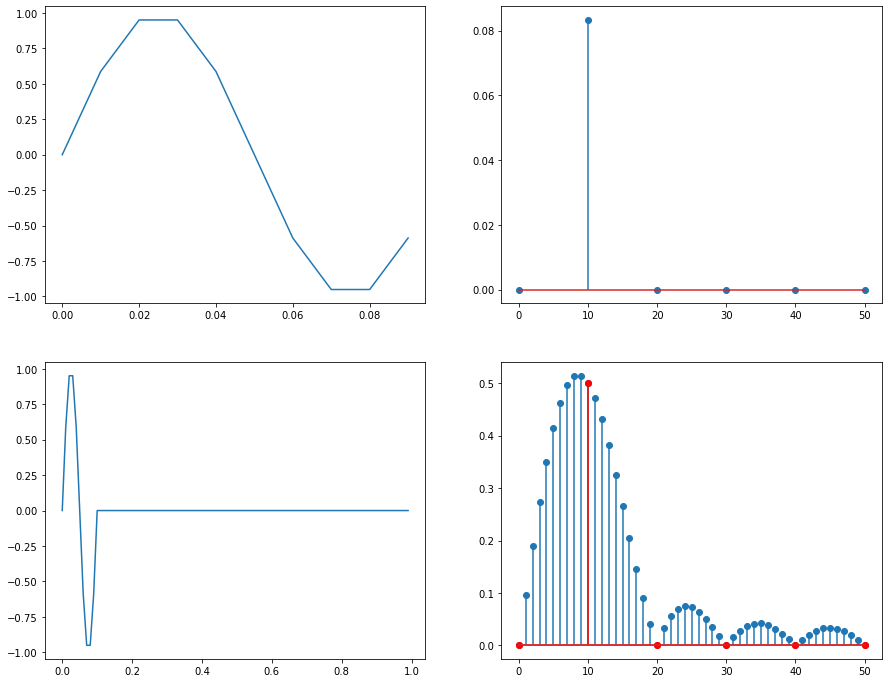

In [143]:
Fs = 100
dt = 1/Fs
T = 0.1
f = 10
t = np.arange(0,T,dt)

s1 = np.sin(2*np.pi*f*t)
przedluz_zerami(t,s1)

Dla sygnału sinusoidalnego o dł. 0.1s i częstości 22Hz próbkowanego 100 Hz

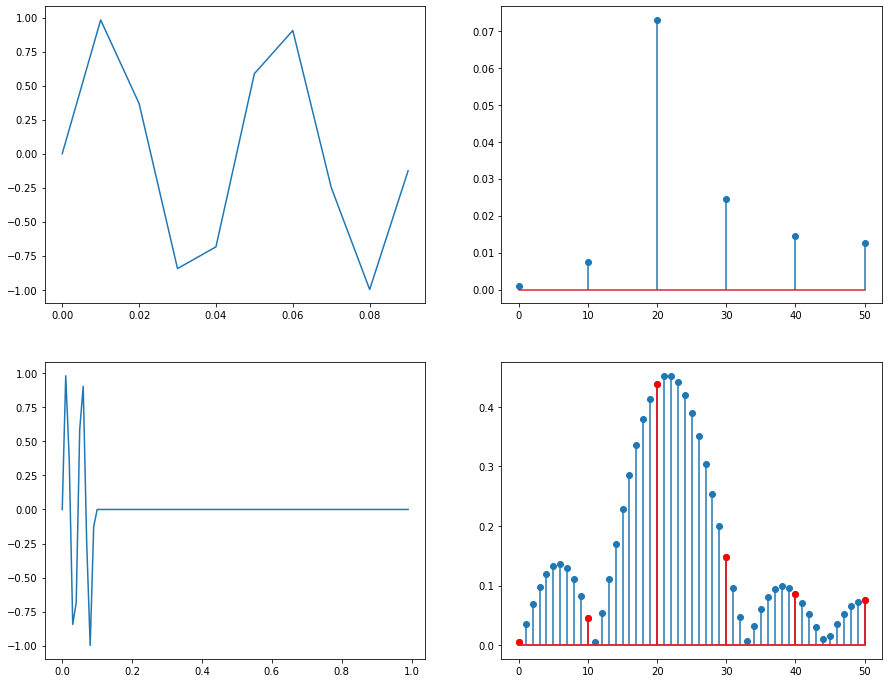

In [145]:
Fs = 100
dt = 1/Fs
T = 0.1
f = 22
t = np.arange(0,T,dt)

s2 = np.sin(2*np.pi*f*t)
przedluz_zerami(t,s2)

Dla sygnału będącego suma dwóch powyższych

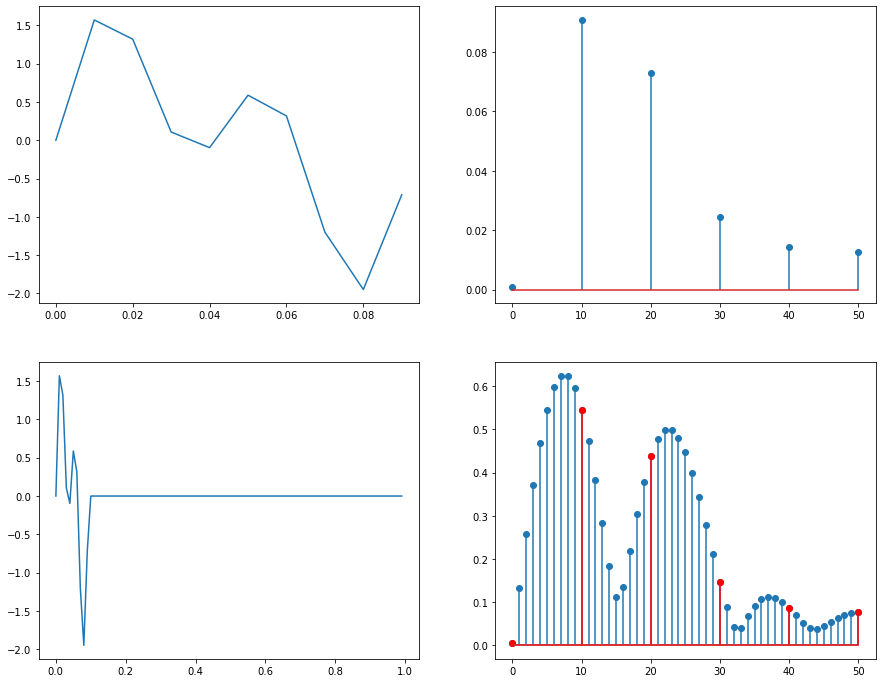

In [147]:
s = s1 + s2
przedluz_zerami(t,s)

Jak można zinterpretować wyniki tego eksperymentu w świetle <a href=https://brain.fuw.edu.pl/edu/index.php/Twierdzenia_o_splocie_i_o_pr%C3%B3bkowaniu_(aliasing)>Twierdzenia o splocie i o próbkowaniu (aliasing)</a>?

Proszę porównać wynik dla metody z powielaniem sygnałów


powiel_sygnal(t,s)

# Co musimy z tego zapamiętać?
* Sygnał może być reprezentowany w dziedzine czasu lub w dziedzinie częstości
* Jak wyglada widmo delty?
* Jak wygląda widmo sinusa, którego całkowita ilość okresów mieści się w badanym fragmencie, a jak jeśli niecałkowita?
* Jak długość sygnału wpływa na rozdzielczość widma?
* Jakie częstości występują w widmie sygnału periodyzowanego cyklicznie?
* Jaki efekt daje przedłużanie zerami?